In [31]:
import numpy as np
import sklearn.svm as sv
import pylab as pl
import pandas as pd
from functools import partial
from sklearn.utils import shuffle
%matplotlib inline

In [32]:
def learn_stat(train_data, train_labels, test_data, test_labels, kernel, C):
    svc = sv.SVC(C=C, kernel = kernel)
    svc.fit(train_data, train_labels)
    train_score = svc.score(train_data, train_labels)
    test_score = svc.score(test_data, test_labels)
    support = len(svc.support_vectors_)
    return train_score, test_score,support

In [95]:
def plot_stat(train_data, train_labels, test_data, test_labels, kernel, minC, maxC, steps):
    # range_step = (float)(maxC - minC)/steps
    c_steps = np.logspace(np.log10(minC),np.log10(maxC),steps) #arange(minC,maxC + range_step,range_step)
    train_scores = list()
    test_scores = list()
    supports = list()
    for r in c_steps:
        res = learn_stat(train_data, train_labels, test_data, test_labels, kernel, r)
        train_scores.append(res[0])
        test_scores.append(res[1])
        supports.append(res[2])
        
    pl.plot(c_steps, train_scores, label = 'Train Scores')
    pl.plot(c_steps, test_scores, label = 'Test Scores', c='r')
    pl.legend(loc='best')
    pl.xscale('log',base=10)
    pl.ylabel('Accuracy')
    pl.xlabel('Costs')
    pl.show()
    pl.plot(c_steps, supports, label = 'Number of support vectors', c='g')
    pl.ylabel('Number of support vectors')
    pl.xscale('log',base=10)
    pl.xlabel('Costs')
    pl.legend(loc='best')
    pl.show()

In [71]:
def plot_support(train_data, train_labels, test_data, test_labels, kernel, C):
    svc = sv.SVC(kernel=kernel, C=C)
    svc.fit(train_data, train_labels)
    supports = svc.support_vectors_
    supports_indeces = svc.support_ #indeces
    supports_labels = list()
    for i in range(len(supports_indeces)):
        supports_labels.append(train_labels[supports_indeces[i]])
        
    h = .02
    x_min, x_max = train_data[1].min() - 0.5, train_data[1].max() + 0.5
    y_min, y_max = train_data[2].min() - 0.5, train_data[2].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()]) #decision function
    Z = Z.reshape(xx.shape)
    pl.contourf(xx, yy, Z, cmap=pl.cm.Paired, alpha=0.8,levels = [-50,-1,0,1,50])
    pl.scatter(supports[:,0], supports[:,1],c = supports_labels, s = 100, marker = 'd', cmap=pl.cm.Paired )
    #print test_data[0]
    pl.scatter(test_data[:,0], test_data[:,1],c = test_labels, cmap=pl.cm.Paired )
    pl.show()

In [72]:
data_train = pd.read_csv('synth_train.csv',header=None)
labels_train = data_train[0]
data_train.drop(0,axis=1,inplace=True)
#labels_train = np.array(labels_train)
#data_train = np.array(data_train)

data_test = pd.read_csv('synth_test.csv',header=None)
labels_test = data_test[0]
data_test.drop(0,axis=1,inplace=True)
labels_test = np.array(labels_test)
data_test = np.array(data_test)

Kernel: Linear

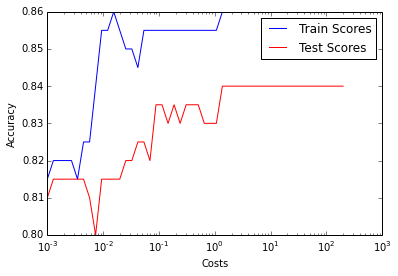

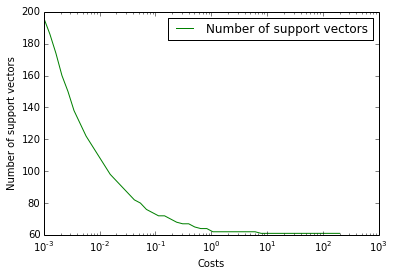

In [96]:
plot_stat(data_train,labels_train,data_test,labels_test,kernel='linear',minC=0.001,maxC=200, steps = 50)


Kernel: rbf

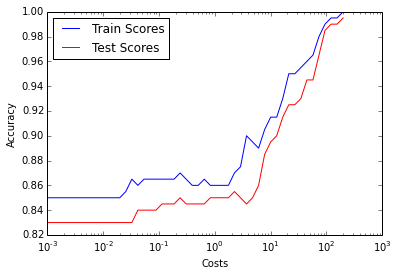

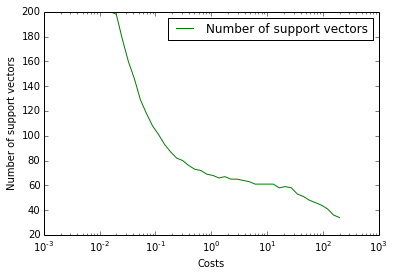

In [97]:
plot_stat(data_train,labels_train,data_test,labels_test,kernel='rbf',minC=0.001,maxC=200, steps = 50)

Four graphs above make us believe at least in two things: 1)the bigger cost the higher accuracy for both train ant test sets and 2) the bigger cost, the less support vectors we will use. And if the second statement is OK, the first is nonsense. Obvioslu, the bigger cost, the more effect of overfitting is. So, the only explanation for this - we have similar data in test and train sets.

For both kernels, the bigget cost, the less number of support vectors classifier uses.
The bigger cost, the higher accuracy we have on train set, it accures due to overfitting.
Because of the fact, that our data sets are not linearly separable, 'rbf' kernel has accuracy close to 1 on very high C(due to overfitting), while linear kernel can't reach accuracy close to 1.

In our case we have a direct connection between train and test accuracy, but it is due to specific data in our sets. For another datasets overfitting(too big cost) will lead to poor accuracy for test set.

We can't use train accuracy for choosing C, because of the effect of overfitting. The optimal value of C can be found with the help of cross-validation.

Kernel: Linear, C: Small

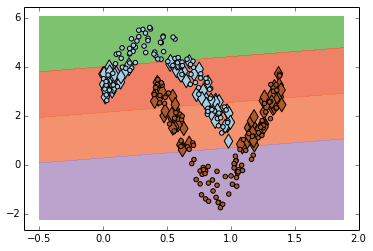

In [73]:
plot_support(data_train,labels_train,data_test,labels_test, kernel="linear", C=0.01)

Kernel: Linear, C: Optimal

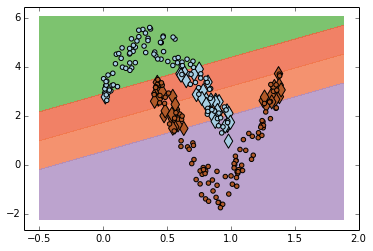

In [74]:
plot_support(data_train,labels_train,data_test,labels_test, kernel="linear", C=200)

Kernel: Linear, C: Huge

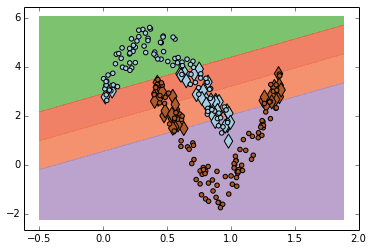

In [75]:
plot_support(data_train,labels_train,data_test,labels_test, kernel="linear", C=2000)

Kernel: RBF, C: Small

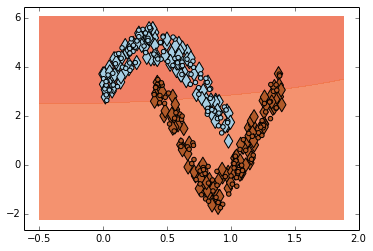

In [76]:
plot_support(data_train,labels_train,data_test,labels_test, kernel="rbf", C=0.01)

Kernel: RBF, C: Optimal

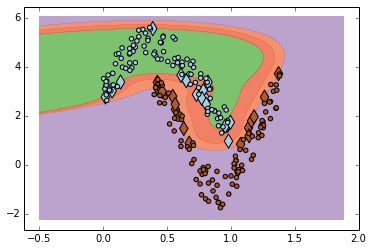

In [66]:
plot_support(data_train,labels_train,data_test,labels_test, kernel="rbf", C=200)

Kernel: RBF, C: Huge

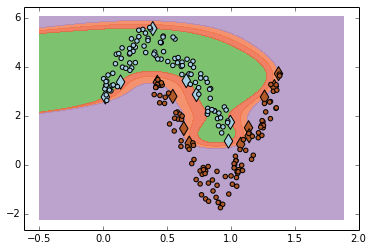

In [67]:
plot_support(data_train,labels_train,data_test,labels_test, kernel="rbf", C=2000)

The smaller C we set, the more distance we have between borders of classes. It occures because while minimizing , impact of mistakes (with small C) is not significant , so we minimize $\frac{1}{2}<w,w>$. And distance between borders of classes, which is equal to $\frac {2}{||w||}$, maximizes
The bigger C, the higher effect of overfitting, so for rbf kernel class borders are very complex because of locations of objects from each class.

Answering on question: "why support vectors are loacted like this" - we have to distinguish two types of objects: violators and support objects, because for linearly not separable case, $\lambda$ equals to zero not only for support objects, but also for vialotors. So, our support vectors lies not always only on class borders.

# №2

In [89]:
all_words = list()
def convert_distance(number):
    return -(number**0.5)

def levensteihn_distance(a, b):
    "Calculates the Levenshtein distance between a and b."
    a = all_words[int(a)]
    b = all_words[int(b)]
    n, m = len(a), len(b)
    if n > m:
        # Make sure n <= m, to use O(min(n,m)) space
        a, b = b, a
        n, m = m, n

    current_row = range(n+1) # Keep current and previous row, not entire matrix
    for i in range(1, m+1):
        previous_row, current_row = current_row, [i]+[0]*n
        for j in range(1,n+1):
            add, delete, change = previous_row[j]+1, current_row[j-1]+1, previous_row[j-1]
            if a[j-1] != b[i-1]:
                change += 1
            current_row[j] = min(add, delete, change)

    return current_row[n]

Function for calculating levensteihn distance was taker from https://ru.wikibooks.org/wiki/%D0%A0%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%BE%D0%B2/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0#Python

In [90]:
def proxy_kernel(X,Y,K):
    gram_matrix = np.zeros((X.shape[0], Y.shape[0]))
    for i,x in enumerate(X):
        for j,y in enumerate(Y):
            distance = K(x, y)
            gram_matrix[i, j] = convert_distance(distance)
    return gram_matrix

In [91]:
my_kernel = partial(proxy_kernel, K=levensteihn_distance)

In [92]:
en_file = open('en.txt', 'r')
en_words = en_file.readlines()
for i,word in enumerate(en_words):
    word = word.replace('\n','')   
    en_words[i] = word

fr_file = open('fr.txt', 'r')
fr_words = fr_file.readlines()
for i, word in enumerate(fr_words):
    word = word.replace('\n','')
    fr_words[i] = word
fr_words

all_words = np.concatenate((en_words,fr_words))

en_labels = np.zeros(len(en_words))
fr_labels = np.ones(len(fr_words))
all_labels = np.concatenate((en_labels,fr_labels))
print len(all_words), len(all_labels)

355648 355648


In [93]:
all_words, all_labels = shuffle(all_words,all_labels)

train_labels = all_labels[10000:10400]
train_indeces = np.array(range(10000,10400,1))
train_indeces = train_indeces.reshape(-1, 1)

svc = sv.SVC(kernel = my_kernel)
svc.fit(train_indeces, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<functools.partial object at 0x115807890>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [94]:
test_labels = all_labels[700:1000]
test_indeces = np.array(range(700,1000,1))
test_indeces = test_indeces.reshape(-1, 1)
svc.score(test_indeces,test_labels)

0.70333333333333337

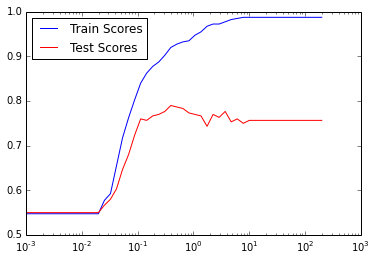

In [87]:
plot_stat(train_indeces, train_labels, test_indeces, test_labels,kernel=my_kernel,minC=0.001,maxC=200, steps = 50)

With big C we have overfitting, so while we have accuracy close to 1 for train set, accuracy for test set slightly drop when C becomes quite big.